## Data Analysis Process
### CSVs in Python

In [1]:
# enrollments = []
# f = open(enrollments_filename, 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

'''
Write code similar to the above to load the engagement
and submission data. Then print the first row of each
table to make sure that your code works.
'''


import unicodecsv

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

enrollments = read_csv('enrollments.csv')
daily_engagement = read_csv('daily_engagement.csv')
project_submissions = read_csv('project_submissions.csv')


enrollments[0], daily_engagement[0], project_submissions[0]    



({u'account_key': u'448',
  u'cancel_date': u'2015-01-14',
  u'days_to_cancel': u'65',
  u'is_canceled': u'True',
  u'is_udacity': u'True',
  u'join_date': u'2014-11-10',
  u'status': u'canceled'},
 {u'acct': u'0',
  u'lessons_completed': u'0.0',
  u'num_courses_visited': u'1.0',
  u'projects_completed': u'0.0',
  u'total_minutes_visited': u'11.6793745',
  u'utc_date': u'2015-01-09'},
 {u'account_key': u'256',
  u'assigned_rating': u'UNGRADED',
  u'completion_date': u'2015-01-16',
  u'creation_date': u'2015-01-14',
  u'lesson_key': u'3176718735',
  u'processing_state': u'EVALUATED'})

### Fixing Data Types

In [2]:
from datetime import datetime as dt
# Takes a date as a string, and returns a Python datetime object.
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(str(date), '%Y-%m-%d')
        
# Takes a string which is either an empty string or represents an integer,
    # and returns an int or None
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)
    
# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])

enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [3]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [4]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])
    
project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

### Investigating the Data

In [5]:
### For each of these three tables, find the number of rows in the table and
### the number of unique students in the table. To find the number of unique
### students, you might want to create a set of the account keys in each table.

unique_students_enrollments = set()
for enrollment in enrollments:
    unique_students_enrollments.add(enrollment['account_key'])
print "Number of rows for enrollments table:", len(enrollments)
print "Number of unique students in enrollments table:", len(unique_students_enrollments)

unique_students_engagemenet = set()
for engagement in daily_engagement:
    unique_students_engagemenet.add(engagement['acct'])
print "\nNumber of rows for daily_engagement table:", len(daily_engagement)
print "Number of unique students in daily_engagement table:", len(unique_students_engagemenet)

unique_students_submissions = set()
for submission in project_submissions:
    unique_students_submissions.add(submission['account_key'])
print "\nNumber of rows for project_submissions table:", len(project_submissions)
print "Number of unique students in project_submissions table:", len(unique_students_submissions)



Number of rows for enrollments table: 1640
Number of unique students in enrollments table: 1302

Number of rows for daily_engagement table: 136240
Number of unique students in daily_engagement table: 1237

Number of rows for project_submissions table: 3642
Number of unique students in project_submissions table: 743


### Problem in the Data
Rename the 'acct' column to 'account_key' in the daily_engagemet table to match with other tables.

In [6]:
for engagement in daily_engagement:
    engagement['account_key'] = engagement['acct']
    del engagement['acct']

daily_engagement[0]['account_key']

u'0'

As the 'account_key' is matched across the tables, make the function to get the number of unique students.

In [7]:
def get_unique_students(data):
    unique_students = set()
    for data_point in data:
        unique_students.add(data_point['account_key'])
    return unique_students

## Check if the results match with what we found earlier.

if (len(get_unique_students(enrollments)) == len(unique_students_enrollments)) and (len(get_unique_students(daily_engagement)) == len(unique_students_engagemenet)):
    if len(get_unique_students(project_submissions))== len(unique_students_submissions):
        print "All the results matches!"
    else:
        print "The results match for enrollments and daily_engagement but not for project_submissions"
        
elif (len(get_unique_students(enrollments)) == len(unique_students_enrollments)) and (len(get_unique_students(daily_engagement)) != len(unique_students_engagemenet)):
    if len(get_unique_students(project_submissions))== len(unique_students_submissions):
        print "The results match for enrollments and project_submissions but not for daily_engagement"
    else:
        print "Only The result for enrollments matches"
    
elif (len(get_unique_students(enrollments)) != len(unique_students_enrollments)) and (len(get_unique_students(daily_engagement)) == len(unique_students_engagemenet)) :
    if len(get_unique_students(project_submissions))== len(unique_students_submissions):
        print "The results match for daily_engagement and project_submissions but not for enrollments"
    else:
        print "Only The result for daily_engagement"
    
else:
    if len(get_unique_students(project_submissions))== len(unique_students_submissions):
        print "Only The result for project_submissions"
    else:
        print "None of the results matches"
        



All the results matches!


### Missing Engagement Records
Why are students missing from daily_engagement?
First, identify surprising data points.

In [8]:
for enrollment in enrollments:
    student= enrollment['account_key']
    if student not in unique_students_engagemenet:
        print enrollment
        break

{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}


We can see the join_date and cancel_date is the same, which would be most likely the reason why there is no record on engagement table.

### Checking for More Problem Records
How many enrollment records, that is not included in engagement table even though enrolled at least a day, are le

In [9]:
num_problem_records = 0
students = set()
for enrollment in enrollments:
    if (enrollment['days_to_cancel'] > 0) or enrollment['days_to_cancel'] == None:
        students = enrollment['account_key']
        if students not in unique_students_engagemenet:
            num_problem_records += 1
            print enrollment
num_problem_records
        

{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}


3

Here we can see all the problem accounts are test accounts, or is_udacity = True.
Since we do not data of test accounts for the analysis, we will remove all the data associated with test accounts for all the tables.

In [10]:
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [11]:
def remove_test_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [12]:
non_udacity_enrollments = remove_test_accounts(enrollments)
non_udacity_engagement = remove_test_accounts(daily_engagement)
non_udacity_submissions = remove_test_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


### Refining the Questions
The original question was:
* How do numbers in the daily engagement table differ for students who pass the first project?

However, the question is under-specified. To make it specific:

1. Exclude engagement records after the project submission
2. Match the lengths of time
3. Exclude the engagement in courses not related to the first project

To sum up,
* Only foucs on engagement from first week and exclude students who cancel within a week

To answer the question, we will begin with 
* create a dictionary of students who either:
    * haven't canceled yet
    * stayed enrolled more than a week


In [13]:
paid_students = {}
for enrollment in non_udacity_enrollments:
    if not enrollment['is_canceled'] or enrollment['days_to_cancel'] > 7:
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        if account_key not in paid_students or enrollment_date > paid_students[account_key]:
            paid_students[account_key] = enrollment_date
        
len(paid_students)

995

### Getting Data from First Week
Create a list of rows from the engagement table including only rows where the student is in paid_students, and the date is within one week of the student's join date.

In [14]:
## Given Function: ##
# Take a student's join date and the date of a specific engagement record
# and returns True if that engagement record happened within one week of the student joining

def within_one_week(join_date,engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7

In [15]:
def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

In [16]:
paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print "Number of rows in paid_enrollments:", len(paid_enrollments)
print "Number of rows in paid_engagement:",len(paid_engagement) 
print "Number of rows in paid_submissions:",len(paid_submissions)

Number of rows in paid_enrollments: 1293
Number of rows in paid_engagement: 134549
Number of rows in paid_submissions: 3618


In [17]:
paid_engagement_in_first_week = []
for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_date = engagement_record['utc_date']
    
    if within_one_week(join_date, engagement_date):
        paid_engagement_in_first_week.append(engagement_record)
len(paid_engagement_in_first_week)

21508

### Exploring Student Engagement: Average Minutes Spent in Classroom

In [18]:
from collections import defaultdict

engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [19]:
total_minutes_by_account = {}

for account_key,engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
        total_minutes_by_account[account_key] = total_minutes

In [20]:
total_minutes = total_minutes_by_account.values()

import numpy as np

print "Mean: ", np.mean(total_minutes)
print "Standard Deviation: " , np.std(total_minutes)
print "Mimimum: ", np.min(total_minutes)
print "Maximum: ", np.max(total_minutes)

Mean:  647.590173826
Standard Deviation:  1129.27121042
Mimimum:  0.0
Maximum:  10568.1008673


### Debugging Data Analysis Code
From the above result, we can see the maximum minutes spent by one student in the first week was more than total minutes a week(24hr * 60mins * 7days = 1080minutes)
To identify the issue, first double-check the maximum minutes are correct manually.


In [21]:
max_minutes_student = None
max_minutes = 0

for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        student_with_max_mins = student
        max_minutes = total_minutes
        
print "Account key for the student with max minutes:",student_with_max_mins
print "Maximum Minutes:", max_minutes

Account key for the student with max minutes: 108
Maximum Minutes: 10568.1008673


Maximum minutes is correct.
Now check the all engagement records for this student.

In [22]:
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_mins:
        print engagement_record

{u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 50.9938951667, u'projects_completed': 0, 'account_key': u'108', u'utc_date': datetime.datetime(2015, 1, 7, 0, 0)}
{u'lessons_completed': 5, u'num_courses_visited': 2, u'total_minutes_visited': 688.3034385, u'projects_completed': 0, 'account_key': u'108', u'utc_date': datetime.datetime(2015, 1, 8, 0, 0)}
{u'lessons_completed': 1, u'num_courses_visited': 2, u'total_minutes_visited': 427.691757667, u'projects_completed': 0, 'account_key': u'108', u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}
{u'lessons_completed': 0, u'num_courses_visited': 3, u'total_minutes_visited': 165.6270925, u'projects_completed': 0, 'account_key': u'108', u'utc_date': datetime.datetime(2015, 1, 10, 0, 0)}
{u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'108', u'utc_date': datetime.datetime(2015, 1, 11, 0, 0)}
{u'lessons_completed': 0, u'num_courses_visited

The list includes more than a week of engagement records for the student with maximum minutes. This implies that the given function, within_one_week, needs to be revised. The original function does not check the engagement date is after the join date, which cause the engagement records for students who rejoined could be included as engagement_date - join_date(to be specific, rejoin date) would be always negative.
To fix the issue, add 'time_delta.days >= 0' to the function.

In [23]:
def within_one_week(join_date,engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days >= 0 and  time_delta.days < 7

Rerunn all codes associated with within_one_week function.

In [24]:
# Get number of engagement records in the first week for the paid students
paid_engagement_in_first_week = []
for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_date = engagement_record['utc_date']
    
    if within_one_week(join_date, engagement_date):
        paid_engagement_in_first_week.append(engagement_record)
print "Number of engagement records in first week:",len(paid_engagement_in_first_week)


# Create dictionary of the first week engagement per paid account
# with format of {account_key:list of dictionaries for each engagement records}
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)
    

# Sum the total minutes spent in the first week per paid account
# with format of {account_key: total minutes}
total_minutes_by_account = {}

for account_key,engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
        total_minutes_by_account[account_key] = total_minutes


# Create the summary of the total minutes spent in the first week per paid account,
# including average, standard deviation, mimimum, and maximum
total_minutes = total_minutes_by_account.values()

import numpy as np

print "Mean: ", np.mean(total_minutes)
print "Standard Deviation: " , np.std(total_minutes)
print "Mimimum: ", np.min(total_minutes)
print "Maximum: ", np.max(total_minutes)

Number of engagement records in first week: 6919
Mean:  306.708326753
Standard Deviation:  412.996933409
Mimimum:  0.0
Maximum:  3564.7332645


Double-check the number of engagement records for the student with maximum minutes is 7 or less.

In [25]:
for account, minutes in total_minutes_by_account.items():
    if minutes == np.max(total_minutes_by_account.values()):
        student_with_max_mins = account

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_mins:
        print engagement_record

{u'lessons_completed': 4, u'num_courses_visited': 4, u'total_minutes_visited': 850.519339666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 9, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 6, u'total_minutes_visited': 872.633923334, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 10, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 2, u'total_minutes_visited': 777.018903666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 11, 0, 0)}
{u'lessons_completed': 2, u'num_courses_visited': 1, u'total_minutes_visited': 294.568774, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 12, 0, 0)}
{u'lessons_completed': 1, u'num_courses_visited': 3, u'total_minutes_visited': 471.2139785, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 13, 0, 0)}
{u'lessons_completed': 1, u'num_cour

### Lessons Completed in First Week
Adopt the code to analyze lessons completed instead of minutes spent, and find mean, standard deviation, minimum, and maximum of lessons completed by account.

In [26]:
# Create a function to group the data by a specific key
def group_data(data,key_name):
    group_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        group_data[key].append(data_point)
    return group_data

# Create a function to sum up a specific field
def sum_grouped_items(grouped_data,field_name):
    sum_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        sum_data[key] = total
    return sum_data
      
# Create a funciton to give summary of stats
def describe_data(data):
    print "Mean: ", np.mean(data)
    print "Standard Deviation: " , np.std(data)
    print "Mimimum: ", np.min(data)
    print "Maximum: ", np.max(data)

In [27]:
engagement_by_account = group_data(paid_engagement_in_first_week, 'account_key')
total_lessons_by_account = sum_grouped_items(engagement_by_account, 'lessons_completed')
total_lessons = total_lessons_by_account.values()
print "Summary of Total Lessons Completed in First Week by Student"
describe_data(total_lessons)


Summary of Total Lessons Completed in First Week by Student
Mean:  1.63618090452
Standard Deviation:  3.00256129983
Mimimum:  0
Maximum:  36


### Number of Visits in the First Week
Analyze the number of days the students visited the classroom by creating field has_visted either 1 or 0, visitted or not-visited.

In [28]:
# Add 'has_visited" field
for engagement_data in paid_engagement:
    if engagement_data['num_courses_visited'] > 0:
        engagement_data['has_visited'] =1
    else:
        engagement_data['has_visited'] = 0

# Rerun some codes so that new column will be added
paid_engagement_in_first_week = []
for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_date = engagement_record['utc_date']
    
    if within_one_week(join_date, engagement_date):
        paid_engagement_in_first_week.append(engagement_record)
        
engagement_by_account = group_data(paid_engagement_in_first_week, 'account_key')      

# Sum by account
days_visited_by_account = sum_grouped_items(engagement_by_account,'has_visited')
describe_data(days_visited_by_account.values())


Mean:  2.86733668342
Standard Deviation:  2.25519800292
Mimimum:  0
Maximum:  7


### Splitting out Passing Students
Create two lists of engagement data for paid students in the first week.
The first list should contain data for students who eventually pass the first project (project keys is provided), and the second list should contain data for students who do not pass.

In [29]:
subway_project_lesson_keys = ['746169184', '3176718735']
pass_subway_project = set()

# List up account_key for the students who has passed the subway project
for submission_record in paid_submissions:
    if submission_record['lesson_key'] in subway_project_lesson_keys \
    and (submission_record['assigned_rating'] == "PASSED" or submission_record['assigned_rating'] == "DISTINCTION"):
        pass_subway_project.add(submission_record['account_key'])

# Split paid student engagement records in the first week into students who has passed the project and not
passing_engagement =[]
non_passing_engagement = []
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)

print "Number of engagement records in first week \
for the students who passed the subway project:", len(passing_engagement)
print "Number of engagement records in first week \
for the students who did not pass the subway project:", len(non_passing_engagement)

Number of engagement records in first week for the students who passed the subway project: 4527
Number of engagement records in first week for the students who did not pass the subway project: 2392


### Comparing the Two Student Groups: Pass vs. Non-Pass

In [30]:
passing_engagement_by_account = group_data(passing_engagement,'account_key')
non_passing_engagement_by_account = group_data(non_passing_engagement, 'account_key')

In [31]:
# Compare total minutes between two groups
passing_total_minutes = sum_grouped_items(passing_engagement_by_account, 'total_minutes_visited')
non_passing_total_minutes = sum_grouped_items(non_passing_engagement_by_account, 'total_minutes_visited')

print "Passing Students Total Minutes Statistics"
describe_data(passing_total_minutes.values())
print"\nNon-Passing Students Total Minutes Statistics" 
describe_data(non_passing_total_minutes.values())

Passing Students Total Minutes Statistics
Mean:  394.586046484
Standard Deviation:  448.499519327
Mimimum:  0.0
Maximum:  3564.7332645

Non-Passing Students Total Minutes Statistics
Mean:  143.326474267
Standard Deviation:  269.538619011
Mimimum:  0.0
Maximum:  1768.52274933


In [32]:
# Compare total lessons completed between two groups
passing_total_lessons = sum_grouped_items(passing_engagement_by_account, 'lessons_completed')
non_passing_total_lessons = sum_grouped_items(non_passing_engagement_by_account, 'lessons_completed')

print "Passing Students Total Completed-Lessons Statistics"
describe_data(passing_total_lessons.values())
print"\nNon-Passing Students Total Completed-Lessons Statistics" 
describe_data(non_passing_total_lessons.values())

Passing Students Total Completed-Lessons Statistics
Mean:  2.05255023184
Standard Deviation:  3.14222705558
Mimimum:  0
Maximum:  36

Non-Passing Students Total Completed-Lessons Statistics
Mean:  0.862068965517
Standard Deviation:  2.54915994183
Mimimum:  0
Maximum:  27


In [33]:
# Compare total days visted between two groups
passing_total_days_visited = sum_grouped_items(passing_engagement_by_account, 'has_visited')
non_passing_total_days_visited = sum_grouped_items(non_passing_engagement_by_account, 'has_visited')

print "Passing Students Total Days Visited Statistics"
describe_data(passing_total_days_visited.values())
print"\nNon-Passing Students Total Days Visited Statistics" 
describe_data(non_passing_total_days_visited.values())

Passing Students Total Days Visited Statistics
Mean:  3.38485316847
Standard Deviation:  2.25882147092
Mimimum:  0
Maximum:  7

Non-Passing Students Total Days Visited Statistics
Mean:  1.90517241379
Standard Deviation:  1.90573144136
Mimimum:  0
Maximum:  7


### Making Histograms

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

def describe_data(data):
    print "Mean: ", np.mean(data)
    print "Standard Deviation: ", np.std(data)
    print "Minimum: ", np.min(data)
    print "Maximum: ", np.max(data)
    plt.hist(data, alpha = 0.6)

Mean:  394.586046484
Standard Deviation:  448.499519327
Minimum:  0.0
Maximum:  3564.7332645
Mean:  143.326474267
Standard Deviation:  269.538619011
Minimum:  0.0
Maximum:  1768.52274933


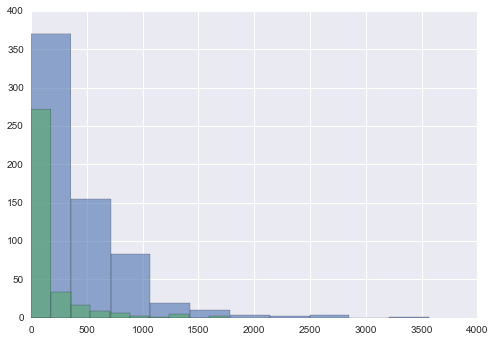

In [35]:
import seaborn as sns

describe_data(passing_total_minutes.values())
describe_data(non_passing_total_minutes.values())

### Further Findings

In [36]:
quitters = []
for enrollment in non_udacity_enrollments:
    if enrollment['is_udacity'] == False and enrollment['days_to_cancel'] > 7:
        quitters.append(enrollment)
len(quitters)

566

Mean:  93.2157303371
Standard Deviation:  57.6713137245
Minimum:  8
Maximum:  264


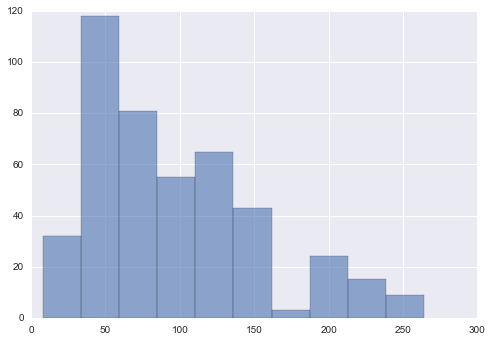

In [37]:
quitter = group_data(quitters,"account_key")
days_to_cancel_quitter = sum_grouped_items(quitter,"days_to_cancel")
describe_data(days_to_cancel_quitter.values())

In [38]:
canceled_after_trial = set()
for enrollment in non_udacity_enrollments:
    if enrollment['days_to_cancel'] > 7 and enrollment['is_udacity'] == False:
        canceled_after_trial.add(enrollment['account_key'])
len(canceled_after_trial)

445

In [39]:
quitter_engagement = []
for engagement_record in non_udacity_engagement:
    account_key = engagement_record['account_key']
    if account_key in canceled_after_trial:
        quitter_engagement.append(engagement_record)

Total Minutes: 
Mean:  2735.67872139
Standard Deviation:  3057.26361332
Minimum:  0.0
Maximum:  25114.2245857


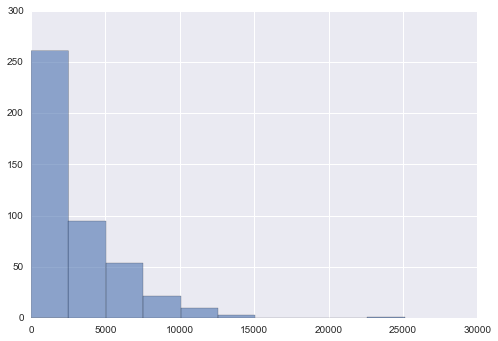

In [40]:
quitter_engagement_by_account = group_data(quitter_engagement,'account_key')

total_minutes_quitter = sum_grouped_items(quitter_engagement_by_account,"total_minutes_visited")

total_lessons_quitter = sum_grouped_items(quitter_engagement_by_account,"lessons_completed")

total_days_visited_quitter = sum_grouped_items(quitter_engagement_by_account,"has_visited")

print "Total Minutes: "
describe_data(total_minutes_quitter.values())

Total Lessons: 
Mean:  13.6426966292
Standard Deviation:  15.4531687427
Minimum:  0
Maximum:  65


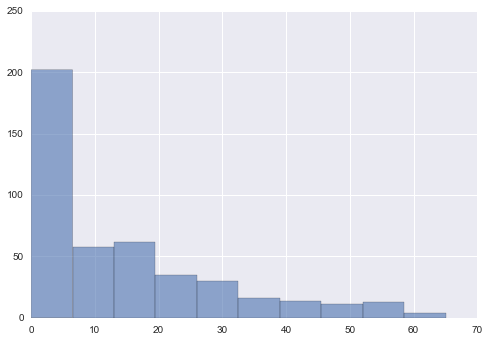

In [41]:
print "Total Lessons: "
describe_data(total_lessons_quitter.values())

Total Days Visited:
Mean:  30.7101123596
Standard Deviation:  30.2377695396
Minimum:  0
Maximum:  171


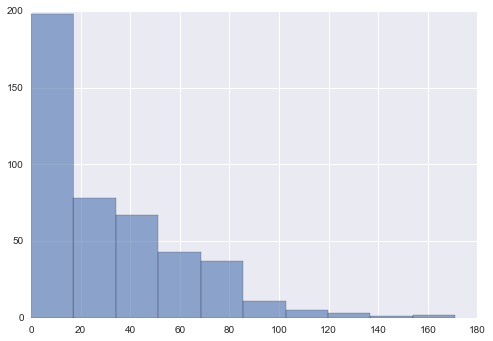

In [42]:
print "Total Days Visited:"
describe_data(total_days_visited_quitter.values())

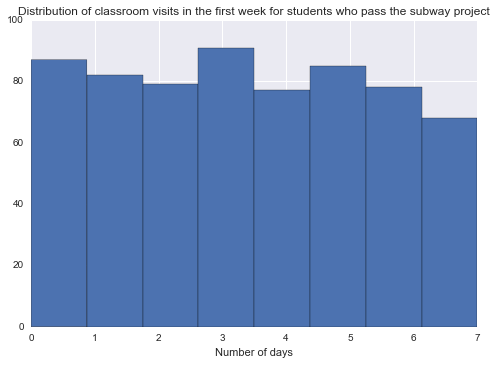

In [43]:
import seaborn as sns
plt.hist(passing_total_days_visited.values(),bins = 8)
plt.xlabel("Number of days")
plt.title("Distribution of classroom visits in the first week " + "for students who pass the subway project")

## NumPy and Pandas for 1D Data
### One-Dimensional Data in NumPy and Pandas
With pandas, loading will be much faster. Use a larger file, daily_engagement_full_.csv, as example.

In [44]:
import pandas as pd
daily_engagement = pd.read_csv('daily_engagement_full.csv')
len(daily_engagement['acct'].unique())

1237

### NumPy Arrays
NumPy and Pandas have a special data structure made to represent 1D data.
NumPy 1D structure called Array, and Pandas 1D structure called Series (built on top of NumPy array).
Pandas Series have more features while NumPy array is simpler.
The data structure of array has similarities and differences with Python lists.

E.g. NumPy array for US states: 'AL', 'AK', 'AZ',,,

**Similarities**
* Access elements by position
    * a[0] --> 'AL'
* Access a range of elements
    * a[1:3] --> 'AK', 'AZ'
* Use loops
    * for x in a:

**Differences**
* Each element should have same datatype
    * string, int, boolean, etc
* Convenient functions
    * mean(), std(), etc
* Can be multi-dimensional

### Vectorized Operations

In [45]:
import numpy as np

# Vector Addition
a = np.array([1,2,3])
b = np.array([4,5,6])
print a+b

# Vector Multiplication
print a*3

[5 7 9]
[3 6 9]


There are more vectorized operations.

* Math Operations
    * Add: +
    * Substract: -
    * Multiply: *
    * Divide: /
    * Exponentiate: **

* Logical Operations (make sure the arrays contain booleans)
    * And: &
    * Or: |
    * Not: ~

* Comparison Operations
    * Greated: >
    * Greater or equal: >=
    * Less: <
    * Less or equal: <=
    * Equal: ==
    * Not equal: !=    

### NumPy Index Arrays

In [46]:
'''
Fill in the function to calculate the mean time spent in the classroom
for students who stayed enrolled at least (greater than or equal to) 7 days.
Assume that days_to_cancel will contain only integers (there are no students who have not canceled yet).
    
The arguments are NumPy arrays. time_spent contains the amount of time spent
in the classroom for each student, and days_to_cancel contains the number
of days until each student cancel. The data is given in the same order
in both arrays.
    '''

def mean_time_for_paid_students(time_spent, days_to_cancel):
    return time_spent[days_to_cancel >= 7].mean()

# Time spent in the classroom in the first week for 20 students
time_spent = np.array([
       12.89697233,    0.        ,   64.55043217,    0.        ,
       24.2315615 ,   39.991625  ,    0.        ,    0.        ,
      147.20683783,    0.        ,    0.        ,    0.        ,
       45.18261617,  157.60454283,  133.2434615 ,   52.85000767,
        0.        ,   54.9204785 ,   26.78142417,    0.
])

# Days to cancel for 20 students
days_to_cancel = np.array([
      4,   5,  37,   3,  12,   4,  35,  38,   5,  37,   3,   3,  68,
     38,  98,   2, 249,   2, 127,  35
])

mean_time_for_paid_students(time_spent, days_to_cancel)

41.054003485454537

### In-Place vs. Not In-Place
+= will modify the existing array, or in-place, while + will create a new array and then get updated. 

In [47]:
# Examples of in-place vs. not in-place
a = np.array([1,2,3,4])
b = a
a+= np.array([1,1,1,1])
print "In-Place:", b

a = np.array([1,2,3,4])
b = a
a= a + np.array([1,1,1,1])
print "Not In-Place:",b


a = np.array([1,2,3,4])
slice = a[:3] # Here it does not create a new array. It is just a snapshot, or view
slice[0] = 100 # Because 'slice' is just a view, any modification made on the slice will reflect to the original array.
print a



In-Place: [2 3 4 5]
Not In-Place: [1 2 3 4]
[100   2   3   4]


### Pandas Series
A series is similar to a NumPy array but with extra functionalities, such as s.describe()

** Similarities to Array **
* Accesssing elements
* Looping
* Convinient functions
* Vectorized operations
* Implemented in C (fast!)

In [48]:
'''
Fill in the function, variable_correlation, to calculate the number of data points for which
the directions of variable1 and variable2 relative to the mean are the same, 
and the number of data points for which they are different.
Direction here means whether each value is above or below its mean.
    
You can classify cases where the value is equal to the mean for one or
both variables however you like.
    
Each argument will be a Pandas series.

'''
countries = ['Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda',
             'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
             'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
             'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia']

life_expectancy_values = [74.7,  75. ,  83.4,  57.6,  74.6,  75.4,  72.3,  81.5,  80.2,
                          70.3,  72.1,  76.4,  68.1,  75.2,  69.8,  79.4,  70.8,  62.7,
                          67.3,  70.6]

gdp_values = [ 1681.61390973,   2155.48523109,  21495.80508273,    562.98768478,
              13495.1274663 ,   9388.68852258,   1424.19056199,  24765.54890176,
              27036.48733192,   1945.63754911,  21721.61840978,  13373.21993972,
                483.97086804,   9783.98417323,   2253.46411147,  25034.66692293,
               3680.91642923,    366.04496652,   1175.92638695,   1132.21387981]

life_expectancy = pd.Series(life_expectancy_values)
gdp = pd.Series(gdp_values)

def variable_correlation(variable1, variable2):
    both_above = (variable1 > variable1.mean()) & (variable2 > variable2.mean())
    both_below = (variable1 < variable1.mean()) & (variable2 < variable2.mean())
    same_direction = both_above|both_below
    num_same_direction = same_direction.sum()
    num_diff_direction = len(variable1) - num_same_direction
    
    return (num_same_direction, num_diff_direction)


variable_correlation(life_expectancy,gdp)    

(17, 3)

### Series Indexes
A Pandas series is like a cross between a list and a dictionary: able to access by position or key

In [49]:
life_expectancy = pd.Series(life_expectancy_values, index = countries )

print "Life expectancy in the country postion at 0:", life_expectancy.iloc[0]
print "Life expectancy in the country index is Angola:", life_expectancy.loc['Angola']

Life expectancy in the country postion at 0: 74.7
Life expectancy in the country index is Angola: 57.6


In [50]:
'''
Fill in the function to return the name of the country
with the highest employment in the given employment
data, and the employment in that country.

'''

countries = [
    'Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
    'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
    'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
    'Belize', 'Benin', 'Bhutan', 'Bolivia',
    'Bosnia and Herzegovina'
]


employment_values = [
    55.70000076,  51.40000153,  50.5       ,  75.69999695,
    58.40000153,  40.09999847,  61.5       ,  57.09999847,
    60.90000153,  66.59999847,  60.40000153,  68.09999847,
    66.90000153,  53.40000153,  48.59999847,  56.79999924,
    71.59999847,  58.40000153,  70.40000153,  41.20000076
]

employment = pd.Series(employment_values, index=countries)

def max_employment(employment):
    max_country = employment.argmax()      # Replace this with your code
    max_value = employment.loc[max_country]   # Replace this with your code

    return (max_country, max_value)

max_employment(employment)

('Angola', 75.699996949999999)

### Filling Missing Values
Write two sets of code:
* add the 2 series together, and drop Nan, and
* add the 2 series together, but treating missing values from either series as 0

In [51]:
s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['c', 'd', 'e', 'f'])
sum_result = s1 + s2

print "Drop:\n",sum_result.dropna()
print "Fill:\n", s1.add(s2, fill_value = 0)

Drop:
c    13.0
d    24.0
dtype: float64
Fill:
a     1.0
b     2.0
c    13.0
d    24.0
e    30.0
f    40.0
dtype: float64


### Pandas Series apply()
apply() takes a series and a function, and returns a new series.
Here is an example:

In [52]:
names = pd.Series([
    'Andre Agassi',
    'Ian Clark',
    'Stephen Curry',
    'Kevin Durant',
    'Draymond Green',
    'Andre Iguodala',
    'Damian Jones',
    'Shaun Livingston',
    'Kevon Looney',
    'James-Michael McAdoo',
    'Patrick McCaw',
    'JaVale McGee',
    'Zaza Pachulia',
    'Klay Thompson',
    'Anderson Varejao',
    'David West',
])

def reverse_name(name):
    split_name = name.split(" ")
    first_name = split_name[0]
    last_name = split_name[1]
    return last_name + ", " + first_name

def reverse_names(names):
    return names.apply(reverse_name)

reverse_names(names)

0             Agassi, Andre
1                Clark, Ian
2            Curry, Stephen
3             Durant, Kevin
4           Green, Draymond
5           Iguodala, Andre
6             Jones, Damian
7         Livingston, Shaun
8             Looney, Kevon
9     McAdoo, James-Michael
10           McCaw, Patrick
11            McGee, JaVale
12           Pachulia, Zaza
13           Thompson, Klay
14        Varejao, Anderson
15              West, David
dtype: object

## NumPy and Pandas for 2D Data
### Two-Dimensional NumPy Arrays
* Python: List of lists
* NumPy: 2D array
* Pandas: DataFrame

2D arrays, as opposed to array of arrays:
* More memory efficient
* Accessing element is different
    * a[1,3] rather than a[1][3] (array of arrays)
* mean(), std(), etc operate on entire array

In [53]:
'''
Find the station with the maximum riders on the first day, 
then return the mean riders per day for that station. 
Also return the mean ridership overall for comparsion.
'''

# Subway ridership for 5 stations on 10 different days
ridership = np.array([
    [   0,    0,    2,    5,    0],
    [1478, 3877, 3674, 2328, 2539],
    [1613, 4088, 3991, 6461, 2691],
    [1560, 3392, 3826, 4787, 2613],
    [1608, 4802, 3932, 4477, 2705],
    [1576, 3933, 3909, 4979, 2685],
    [  95,  229,  255,  496,  201],
    [   2,    0,    1,   27,    0],
    [1438, 3785, 3589, 4174, 2215],
    [1342, 4043, 4009, 4665, 3033]
])

def mean_riders_for_max_station(ridership):
    max_first_day = ridership[0,:].argmax()
    mean_for_max = ridership[:,max_first_day].mean()
    overall_mean = ridership.mean()
    return (mean_for_max, overall_mean)
    
mean_riders_for_max_station(ridership)    

(3239.9000000000001, 2342.5999999999999)

### NumPy Axis
axis = 0 is by column, axis = 1 is by row.
Find the mean ridership per day for each subway station.
Return the max and min ridership per day.

In [54]:
'''
First, for each subway station, calculate the mean ridership per day. 
Then, out of all the subway stations, return the maximum and minimum of
these values. That is, find the maximum mean-ridership-per-day and
the minimum mean-ridership-per-day for any subway station.
'''


def min_and_max_riders_per_day(ridership):
    ridership_per_day = ridership.mean(axis=0)
    max_daily_ridership = ridership_per_day.max()     
    min_daily_ridership = ridership_per_day.min()
    
    return (max_daily_ridership, min_daily_ridership)

min_and_max_riders_per_day(ridership)

(3239.9000000000001, 1071.2)

### NumPy and Pandas Data Types
As for NumPy 2D data, math operators (mean(),std(), etc) cannot be used when the data does not only consists of number/int. 
Pandas DataFrame would be benefitial over NumPy 2D arrays to use math operators. Below shows how to create DataFrame.

In [55]:
import pandas as pd
enrollments_df = pd.DataFrame({
        "account_key":[448, 448, 448, 448, 448],
        "status": ["canceled", "canceled", "canceled", "canceled", "current"],
        "join_date": ["2014-11-10", "2014-11-05", "2015-01-27", "2014-11-10","2015-03-10"],
        "days_to_cancel": [65,5,0,0,np.nan],
        "is_udacity": [True,True,True,True,True]
    })

enrollments_df

,account_key,days_to_cancel,is_udacity,join_date,status
0,448,65.0,True,2014-11-10,canceled
1,448,5.0,True,2014-11-05,canceled
2,448,0.0,True,2015-01-27,canceled
3,448,0.0,True,2014-11-10,canceled
4,448,NaN,True,2015-03-10,current


In [56]:
enrollments_df.mean()

account_key       448.0
days_to_cancel     17.5
is_udacity          1.0
dtype: float64

### Accessing Elements of a DataFrame

In [57]:
'''
With Pandas DataFrame input, find the station with the maximum riders 
on the first day, then return the mean riders per day for that station.
Also return the mean ridership overall for comparsion.

'''

ridership_df = pd.DataFrame(
    data=[[   0,    0,    2,    5,    0],
          [1478, 3877, 3674, 2328, 2539],
          [1613, 4088, 3991, 6461, 2691],
          [1560, 3392, 3826, 4787, 2613],
          [1608, 4802, 3932, 4477, 2705],
          [1576, 3933, 3909, 4979, 2685],
          [  95,  229,  255,  496,  201],
          [   2,    0,    1,   27,    0],
          [1438, 3785, 3589, 4174, 2215],
          [1342, 4043, 4009, 4665, 3033]],
    index=['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
           '05-06-11', '05-07-11', '05-08-11', '05-09-11', '05-10-11'],
    columns=['R003', 'R004', 'R005', 'R006', 'R007']
)

def mean_riders_for_max_station(ridership):
    max_first_day = ridership_df.iloc[0].argmax()
    mean_for_max =  ridership_df[max_first_day].mean()
    overall_mean = ridership_df.values.mean()
    return (mean_for_max, overall_mean)

mean_riders_for_max_station(ridership)

(3239.9, 2342.5999999999999)

### Loading Data into a DataFrame
DataFrames are a great data structure to represent CSVs as CSV is two dimensional data structure with different data types for each column. Below shows how to load CSV files.

In [58]:
import pandas as pd

subway_df = pd.read_csv('nyc_subway_weather.csv')

# Print out only first five rows
subway_df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [59]:
# Basic statistics of each column
subway_df.describe()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,latitude,longitude,fog,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
count,4.264900e+04,4.264900e+04,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,...,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000
mean,2.812486e+07,1.986993e+07,1886.589955,1361.487866,10.046754,2.905719,0.714436,40.724647,-73.940364,0.009824,...,29.971096,0.224741,63.103780,6.927872,0.004618,29.971096,63.103780,6.927872,40.728555,-73.938693
std,3.043607e+07,2.028986e+07,2952.385585,2183.845409,6.938928,2.079231,0.451688,0.071650,0.059713,0.098631,...,0.137942,0.417417,8.455597,4.510178,0.016344,0.131158,6.939011,3.179832,0.065420,0.059582
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,40.576152,-74.073622,0.000000,...,29.550000,0.000000,46.900000,0.000000,0.000000,29.590000,49.400000,0.000000,40.600204,-74.014870
25%,1.039762e+07,7.613712e+06,274.000000,237.000000,4.000000,1.000000,0.000000,40.677107,-73.987342,0.000000,...,29.890000,0.000000,57.000000,4.600000,0.000000,29.913333,58.283333,4.816667,40.688591,-73.985130
50%,1.818389e+07,1.331609e+07,905.000000,664.000000,12.000000,3.000000,1.000000,40.717241,-73.953459,0.000000,...,29.960000,0.000000,61.000000,6.900000,0.000000,29.958000,60.950000,6.166667,40.720570,-73.949150
75%,3.263049e+07,2.393771e+07,2255.000000,1537.000000,16.000000,5.000000,1.000000,40.759123,-73.907733,0.000000,...,30.060000,0.000000,69.100000,9.200000,0.000000,30.060000,67.466667,8.850000,40.755226,-73.912033
max,2.357746e+08,1.493782e+08,32814.000000,34828.000000,20.000000,6.000000,1.000000,40.889185,-73.755383,1.000000,...,30.320000,1.000000,86.000000,23.000000,0.157500,30.293333,79.800000,17.083333,40.862064,-73.694176


### Calculating Correlation (Pearson's r)
Pearson's r:
* Ranges from -1 to 1
* First standardize each variable
* Multiply each pair of values, and take the average

r = average of (x in std units) * (y in std units)


In [60]:
'''
Compute the correlation between the two input variables. 
Each input is either a NumPy array or a Pandas Series.
    
correlation = average of (x in standard units) times (y in standard units)
    
Remember to pass the argument "ddof=0" to the Pandas std() function!
'''

def correlation(x, y):
    x_stdv = (x - x.mean())/x.std(ddof = 0)
    y_stdv = (y-y.mean())/y.std(ddof = 0)
    return (x_stdv*y_stdv).mean()

entries = subway_df['ENTRIESn_hourly']
cum_entries = subway_df['ENTRIESn']
rain = subway_df['meanprecipi']
temp = subway_df['meantempi']


print "Correlation between Number of Entries and Rain:", correlation(entries, rain)
print "Correlation between Number of Entries and Temperature:", correlation(entries, temp)
print "Correlation between Rain and Temperature:", correlation(rain, temp)

print "Correlation between Number of Entries and Cummulative Entries:", correlation(entries, cum_entries)
 

Correlation between Number of Entries and Rain: 0.0356485157722
Correlation between Number of Entries and Temperature: -0.0266933483216
Correlation between Rain and Temperature: -0.229034323408
Correlation between Number of Entries and Cummulative Entries: 0.585895470766


### Pandas Axis Names
Pandas DataFrame takes axis = 'index' or axis = 'columns.'
Note that df.mean(axis = 'index') taking mean along the index, or mean of each column. df.mean(axis = 'column') returning mean along the columns, or mean of each row.


### DataFrame Vectorized Operations
* Similar to vectorized operations for 2D NumPy arrays.
* Match up element by index and column name rather than position

In [61]:
'''
Take a DataFrame with cumulative entries and exits 
(entries in the first column, exits in the second)
and return a DataFrame with hourly entries and exits 
(entries in thefirst column, exits in the second).
'''


entries_and_exits = pd.DataFrame({
    'ENTRIESn': [3144312, 3144335, 3144353, 3144424, 3144594,
                 3144808, 3144895, 3144905, 3144941, 3145094],
    'EXITSn': [1088151, 1088159, 1088177, 1088231, 1088275,
               1088317, 1088328, 1088331, 1088420, 1088753]
})



def get_hourly_entries_and_exits(entries_and_exits):
    shifted_entries_and_exits = entries_and_exits.shift(axis = 0)
    hourly_entries_and_exits = entries_and_exits.sub(shifted_entries_and_exits)
    return hourly_entries_and_exits
    
    
get_hourly_entries_and_exits(entries_and_exits)


,ENTRIESn,EXITSn
0,NaN,NaN
1,23.0,8.0
2,18.0,18.0
3,71.0,54.0
4,170.0,44.0
5,214.0,42.0
6,87.0,11.0
7,10.0,3.0
8,36.0,89.0
9,153.0,333.0


In [62]:
# Different apporach for the previous exercise

def get_hourly_entries_and_exits(entries_and_exits):
    
    return entries_and_exits.diff()

get_hourly_entries_and_exits(entries_and_exits)

,ENTRIESn,EXITSn
0,NaN,NaN
1,23.0,8.0
2,18.0,18.0
3,71.0,54.0
4,170.0,44.0
5,214.0,42.0
6,87.0,11.0
7,10.0,3.0
8,36.0,89.0
9,153.0,333.0


### DataFrame applymap()
applymap() applies a function to a DataFrame for each series in the DataFrame while apply() only applies function along input axis of DataFrame

In [63]:
'''
Convert the given DataFrame of numerical grades to letter grades. 
Return a new DataFrame with the converted grade.
    
The conversion rule is:
    90-100 -> A
    80-89  -> B
    70-79  -> C
    60-69  -> D
    0-59   -> F
'''

grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)
  
def convert_grade(grade):
    if grade >= 90:
        return 'A'
    elif grade >= 80:
        return 'B'
    elif grade >= 70:
        return 'C'
    elif grade >= 60:
        return 'D'
    else:
        return 'F'
    

    
def convert_grades(grades):
    return grades.applymap(convert_grade)

convert_grades(grades_df)

,exam1,exam2
Andre,F,F
Barry,B,D
Chris,C,F
Dan,C,F
Emilio,B,D
Fred,C,F
Greta,A,C
Humbert,D,F
Ivan,A,C
James,B,D


### DataFrame apply()

In [64]:
'''
Standardize each column of the given DataFrame. To standardize
a variable, convert each value to the number of standard 
deviations it is above or below the mean.
'''

grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

def std(data):
    mean = data.mean()
    std = data.std(ddof=0)
    return (data-mean)/std

def standardize(df):

    return df.apply(std)

standardize(grades_df)

,exam1,exam2
Andre,-2.315341,-2.304599
Barry,0.220191,0.386400
Chris,0.020017,-0.096600
Dan,-0.180156,-0.096600
Emilio,0.753987,0.662400
Fred,-0.513779,-0.441600
Greta,0.887436,1.490400
Humbert,-0.847401,-0.786600
Ivan,1.354508,1.007400
James,0.620538,0.179400


### DataFrame apply()- Use Case 2

In [65]:
'''
Return the second-largest value of each 
column of the input DataFrame.
'''

df = pd.DataFrame({
    'a': [4, 5, 3, 1, 2],
    'b': [20, 10, 40, 50, 30],
    'c': [25, 20, 5, 15, 10]
})

def second_largest_column(data):
    new_data = data.sort_values(ascending = False)
    return new_data.iloc[1]

def second_large(df):
    return df.apply(second_largest_column)

second_large(df)

a     4
b    40
c    20
dtype: int64

In [66]:
# Alternative answers
def second_largest_column(data):
    new_data = data.nlargest(2)
    return new_data.iloc[1]

def second_large(df):
    return df.apply(second_largest_column)

second_large(df)


a     4
b    40
c    20
dtype: int64

### Adding a DataFrame to a Series

In [67]:
# Adding a Series to a square DataFrame
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
        0: [10, 20, 30, 40],
        1: [50, 60, 70, 80],
        2: [90, 100, 110, 120],
        3: [130, 140, 150, 160]
    })
    
print "Adding a Series to a square DataFrame\n" ,df + s

# Adding a Series to a one-row DataFrame
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({0: [10], 1: [20], 2: [30], 3: [40]})
print "\nAdding a Series to a one-row DataFrame\n" ,df + s

# Adding a Series to a one-column DataFrame
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({0: [10, 20, 30, 40]})
print "\nAdding a Series to a one-column DataFrame\n" ,df + s

# Adding a Series to a one-column DataFrame Using add()
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({0: [10, 20, 30, 40]})
print "\nAdding a Series to a one-column DataFrame using add funtion\n" ,df.add(s, axis = 'index')

# Adding when DataFrame column names match Series index
s = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
df = pd.DataFrame({
        'a': [10, 20, 30, 40],
        'b': [50, 60, 70, 80],
        'c': [90, 100, 110, 120],
        'd': [130, 140, 150, 160]
    })

print "\nAdding when DataFrame column names match Series index\n" ,df + s

# Adding when DataFrame column names don't match Series index
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
        'a': [10, 20, 30, 40],
        'b': [50, 60, 70, 80],
        'c': [90, 100, 110, 120],
        'd': [130, 140, 150, 160]
    })
print "\nAdding when DataFrame column names don't match Series index\n" ,df + s

Adding a Series to a square DataFrame
    0   1    2    3
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164

Adding a Series to a one-row DataFrame
    0   1   2   3
0  11  22  33  44

Adding a Series to a one-column DataFrame
    0   1   2   3
0  11 NaN NaN NaN
1  21 NaN NaN NaN
2  31 NaN NaN NaN
3  41 NaN NaN NaN

Adding a Series to a one-column DataFrame using add funtion
    0
0  11
1  22
2  33
3  44

Adding when DataFrame column names match Series index
    a   b    c    d
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164

Adding when DataFrame column names don't match Series index
    0   1   2   3   a   b   c   d
0 NaN NaN NaN NaN NaN NaN NaN NaN
1 NaN NaN NaN NaN NaN NaN NaN NaN
2 NaN NaN NaN NaN NaN NaN NaN NaN
3 NaN NaN NaN NaN NaN NaN NaN NaN


### Standardizing Each Column Again

In [113]:
'''
Use vectorized operations instead of apply() to standardize 
each column of the given DataFrame. To standardize a variable, 
convert each value to the number of standard deviations it is
above or below the mean.

You should get the same results as you did before.
'''

grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

def standardize(df):
    mean_column = df.mean(axis = 0)
    std_column = df.std(axis = 0, ddof = 0)
    mean_diff = df.sub(mean_column, axis = 'columns')
    return mean_diff.div(std_column, axis = 'columns')

def standardize_rows(df):
    mean_row = df.mean(axis = 1)
    std_row = df.std(axis = 1, ddof = 0)
    mean_diff = df.sub(mean_row, axis = 'index')
    return mean_diff.div(std_row, axis = 'index')


print standardize(grades_df)
print standardize_rows(grades_df)

            exam1     exam2
Andre   -2.315341 -2.304599
Barry    0.220191  0.386400
Chris    0.020017 -0.096600
Dan     -0.180156 -0.096600
Emilio   0.753987  0.662400
Fred    -0.513779 -0.441600
Greta    0.887436  1.490400
Humbert -0.847401 -0.786600
Ivan     1.354508  1.007400
James    0.620538  0.179400
         exam1  exam2
Andre      1.0   -1.0
Barry      1.0   -1.0
Chris      1.0   -1.0
Dan        1.0   -1.0
Emilio     1.0   -1.0
Fred       1.0   -1.0
Greta      1.0   -1.0
Humbert    1.0   -1.0
Ivan       1.0   -1.0
James      1.0   -1.0


### Calculating Hourly Entries and Exits Using groupby()

In [118]:
'''
Take a DataFrame with cumulative entries and exits and return 
a DataFrame with hourly entries and exits. The hourly entries 
and exits should be calculated separately for each station (the 'UNIT' column).
    
Hint: Use the `get_hourly_entries_and_exits()` function you wrote
in a previous quiz, DataFrame Vectorized Operations, and the `.apply()`
function, to help solve this problem.
'''
ridership_df = pd.DataFrame({
    'UNIT': ['R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051'],
    'TIMEn': ['00:00:00', '02:00:00', '04:00:00', '06:00:00', '08:00:00', '10:00:00', '12:00:00', '14:00:00', '16:00:00'],
    'ENTRIESn': [3144312, 8936644, 3144335, 8936658, 3144353, 8936687, 3144424, 8936819, 3144594],
    'EXITSn': [1088151, 13755385,  1088159, 13755393,  1088177, 13755598, 1088231, 13756191,  1088275]
})

def hourly_for_group(data):
    return data - data.shift(1)

def get_hourly_entries_and_exits(entries_and_exits):
    entries_and_exits_by_station = entries_and_exits.groupby('UNIT')
    return entries_and_exits_by_station[['ENTRIESn','EXITSn']].apply(hourly_for_group)
    
get_hourly_entries_and_exits(ridership_df)

,ENTRIESn,EXITSn
0,NaN,NaN
1,NaN,NaN
2,23.0,8.0
3,14.0,8.0
4,18.0,18.0
5,29.0,205.0
6,71.0,54.0
7,132.0,593.0
8,170.0,44.0


### Combining Pandas DataFrame

In [120]:
'''
Take 2 DataFrames, one with subway data and one with weather data, and return 
a single dataframe with one row for each date, hour, and location. Only include
times and locations that have both subway data and weather data available.
'''
subway_df = pd.DataFrame({
    'UNIT': ['R003', 'R003', 'R003', 'R003', 'R003', 'R004', 'R004', 'R004',
             'R004', 'R004'],
    'DATEn': ['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
              '05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'ENTRIESn': [ 4388333,  4388348,  4389885,  4391507,  4393043, 14656120,
                 14656174, 14660126, 14664247, 14668301],
    'EXITSn': [ 2911002,  2911036,  2912127,  2913223,  2914284, 14451774,
               14451851, 14454734, 14457780, 14460818],
    'latitude': [ 40.689945,  40.689945,  40.689945,  40.689945,  40.689945,
                  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ],
    'longitude': [-73.872564, -73.872564, -73.872564, -73.872564, -73.872564,
                  -73.867135, -73.867135, -73.867135, -73.867135, -73.867135]
})

weather_df = pd.DataFrame({
    'DATEn': ['05-01-11', '05-01-11', '05-02-11', '05-02-11', '05-03-11',
              '05-03-11', '05-04-11', '05-04-11', '05-05-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'latitude': [ 40.689945,  40.69132 ,  40.689945,  40.69132 ,  40.689945,
                  40.69132 ,  40.689945,  40.69132 ,  40.689945,  40.69132 ],
    'longitude': [-73.872564, -73.867135, -73.872564, -73.867135, -73.872564,
                  -73.867135, -73.872564, -73.867135, -73.872564, -73.867135],
    'pressurei': [ 30.24,  30.24,  30.32,  30.32,  30.14,  30.14,  29.98,  29.98,
                   30.01,  30.01],
    'fog': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'rain': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'tempi': [ 52. ,  52. ,  48.9,  48.9,  54. ,  54. ,  57.2,  57.2,  48.9,  48.9],
    'wspdi': [  8.1,   8.1,   6.9,   6.9,   3.5,   3.5,  15. ,  15. ,  15. ,  15. ]
})


def combine_dfs(subway_df, weather_df):
    return subway_df.merge(weather_df, on = ['DATEn' , 'hour', 'latitude', 'longitude'], how = 'inner')

combine_dfs(subway_df, weather_df)

,DATEn,ENTRIESn,EXITSn,UNIT,hour,latitude,longitude,fog,pressurei,rain,tempi,wspdi
0,05-01-11,4388333,2911002,R003,0,40.689945,-73.872564,0,30.24,0,52.0,8.1
1,05-02-11,4388348,2911036,R003,0,40.689945,-73.872564,0,30.32,0,48.9,6.9
2,05-03-11,4389885,2912127,R003,0,40.689945,-73.872564,0,30.14,0,54.0,3.5
3,05-04-11,4391507,2913223,R003,0,40.689945,-73.872564,0,29.98,0,57.2,15.0
4,05-05-11,4393043,2914284,R003,0,40.689945,-73.872564,0,30.01,0,48.9,15.0
5,05-01-11,14656120,14451774,R004,0,40.691320,-73.867135,0,30.24,0,52.0,8.1
6,05-02-11,14656174,14451851,R004,0,40.691320,-73.867135,0,30.32,0,48.9,6.9
7,05-03-11,14660126,14454734,R004,0,40.691320,-73.867135,0,30.14,0,54.0,3.5
8,05-04-11,14664247,14457780,R004,0,40.691320,-73.867135,0,29.98,0,57.2,15.0
9,05-05-11,14668301,14460818,R004,0,40.691320,-73.867135,0,30.01,0,48.9,15.0


### Plotting for DataFrames

In [122]:
subway_df = pd.read_csv('nyc_subway_weather.csv')

In [123]:
subway_df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [124]:
subway_df_by_week=subway_df.groupby('day_week')
ridership_by_day = subway_df_by_week.mean()['ENTRIESn_hourly']

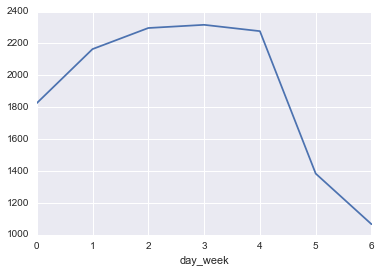

In [125]:
%matplotlib inline
import seaborn as sns
ridership_by_day.plot()

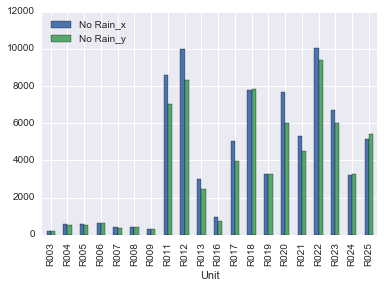

In [126]:
subway_df = pd.read_csv('nyc_subway_weather.csv')
rain = subway_df.loc[subway_df['rain']== True]
no_rain = subway_df.loc[subway_df['rain'] == False]

rain_ridership_by_day = rain.groupby('UNIT',as_index = False)['ENTRIESn_hourly'].mean()
no_rain_ridership_by_day = no_rain.groupby('UNIT', as_index = False)['ENTRIESn_hourly'].mean()

rain_ridership_df = pd.DataFrame({'Unit':rain_ridership_by_day['UNIT'][:20],'No Rain':rain_ridership_by_day['ENTRIESn_hourly'][:20]})
no_rain_ridership_df = pd.DataFrame({'Unit':no_rain_ridership_by_day['UNIT'][:20],'No Rain':no_rain_ridership_by_day['ENTRIESn_hourly'][:20]})
rain_and_no_rain_ridership_df = rain_ridership_df.merge(no_rain_ridership_df, on='Unit', how = 'outer')
rain_and_no_rain_ridership_df.plot(kind='bar',x='Unit')

In [127]:
data_by_location = subway_df.groupby(['latitude','longitude'],as_index = False).mean()

In [128]:
scaled_entries = data_by_location['ENTRIESn_hourly']/data_by_location['ENTRIESn_hourly'].std()

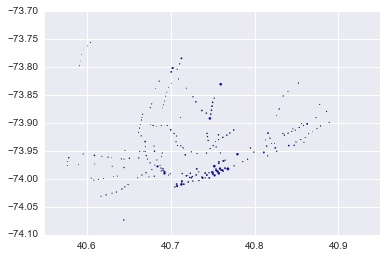

In [129]:
plt.scatter(data_by_location['latitude'],data_by_location['longitude'],s=scaled_entries)

### Three-Dimensional Data

In [82]:
a = np.array([[['A1a','A1b','A1c'],['A2a','A2b','A2c']],[['B1a','B1b','B1c'],['B2a','B2b','B2c']]])

In [83]:
wp = pd.Panel(np.random.randn(2,5,4),items=['Item1','Item2'],major_axis=pd.date_range('1/1/2016',periods = 5),minor_axis = ['A','B','C','D'])
wp

<class 'pandas.core.panel.Panel'>
Dimensions: 2 (items) x 5 (major_axis) x 4 (minor_axis)
Items axis: Item1 to Item2
Major_axis axis: 2016-01-01 00:00:00 to 2016-01-05 00:00:00
Minor_axis axis: A to D